# Week13 Dealing with Imbalanced Dataset


# Preparation

In [ ]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1mjRQ13ELyzcYiFyCGiIeCqYYeGI9qGXd' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1mjRQ13ELyzcYiFyCGiIeCqYYeGI9qGXd" -O creditfraud.zip && rm -rf /tmp/cookies.txt
!!unzip creditfraud.zip -d /content/input/

--2020-12-04 14:06:49--  https://docs.google.com/uc?export=download&confirm=qrqW&id=1mjRQ13ELyzcYiFyCGiIeCqYYeGI9qGXd
Resolving docs.google.com (docs.google.com)... 172.217.164.174, 2607:f8b0:4004:807::200e
Connecting to docs.google.com (docs.google.com)|172.217.164.174|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-10-40-docs.googleusercontent.com/docs/securesc/bm0p33qs81tthe4gcndbolmrcc9p4sde/clj3e3obvat8up1bf53q94q0jbb5na1h/1607090775000/10000090644219567406/15138237736271400556Z/1mjRQ13ELyzcYiFyCGiIeCqYYeGI9qGXd?e=download [following]
--2020-12-04 14:06:49--  https://doc-10-40-docs.googleusercontent.com/docs/securesc/bm0p33qs81tthe4gcndbolmrcc9p4sde/clj3e3obvat8up1bf53q94q0jbb5na1h/1607090775000/10000090644219567406/15138237736271400556Z/1mjRQ13ELyzcYiFyCGiIeCqYYeGI9qGXd?e=download
Resolving doc-10-40-docs.googleusercontent.com (doc-10-40-docs.googleusercontent.com)... 172.217.164.161, 2607:f8b0:4004:815::2001
Connecting to do

['Archive:  creditfraud.zip', '  inflating: /content/input/creditcard.csv  ']

In [ ]:
import numpy as np 
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score

Correcting Previous Mistakes from Imbalanced Datasets:



*   Never test on the oversampled or undersampled dataset.
*   If we want to implement cross validation, remember to oversample or undersample your training data during cross-validation, not before!
*   Don't use accuracy score as a metric with imbalanced datasets (will be usually high and misleading), instead use f1-score, precision/recall score or confusion matrix

## Loading Data

In [ ]:
df = pd.read_csv('./input/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

Getting basic Idea

In [ ]:
#@title
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Target variable


In [ ]:
# The classes are heavily skewed we need to solve this issue later.
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

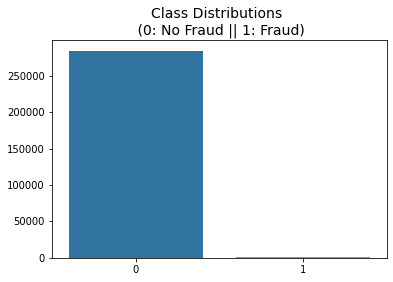

In [ ]:
#@title
x=df['Class'].value_counts().values
sns.barplot([0,1],x)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

In [ ]:
df = df.drop(['Time', 'Amount'], axis=1)

# Imbalanced Dataset

## The metric trap

In [ ]:
# naive classifier
def naive_classify(X_train):
    # we don't care X_train dataset. Just predict everything as 'NotFraud'
    y_pred = np.array([0] * X_train.shape[0])
    return y_pred

In [ ]:
from sklearn.metrics import accuracy_score

y_true_naive = df['Class'].values
# print(y_true.shape)
x_naive = df.drop(['Class'], axis=1).values
y_pred_naive = naive_classify(x_naive)
print(accuracy_score(y_true_naive, y_pred_naive))

0.9982725143693799


## New evaluation metric

<h3>Terms:<h3>

True Positives: Correctly Classified Fraud Transactions

False Positives: Incorrectly Classified Fraud Transactions

True Negative: Correctly Classified Non-Fraud Transactions

False Negative: Incorrectly Classified Non-Fraud Transactions

false negatives 는 탐 지못한것,.
false positives 는 오탐지한것.


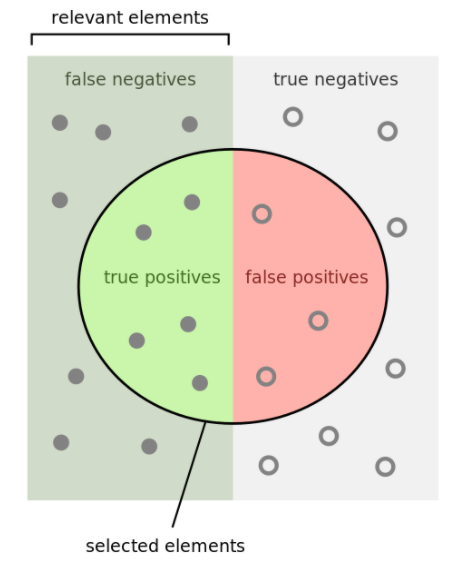

**Confusion Matrix**: a table showing correct predictions and types of incorrect predictions.
    
**Precision**: the number of true positives divided by all positive predictions. Precision is also called Positive Predictive Value. It is a measure of a classifier’s exactness. Low precision indicates a high number of false positives.
    
**Recall**: the number of true positives divided by the number of positive values in the test data. Recall is also called Sensitivity or the True Positive Rate. It is a measure of a classifier’s completeness. Low recall indicates a high number of false negatives.
    
**F1 Score**: the weighted average of precision and recall. (harmonic average)

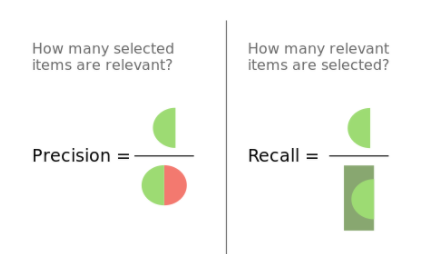

In [ ]:
from sklearn.metrics import classification_report

y_true_naive = df['Class'].values
# print(y_true.shape)
x_t = df.drop(['Class'], axis=1).values
y_pred_naive = naive_classify(x_t)
print(classification_report(y_true_naive, y_pred_naive, target_names=['NotFraud', 'Fraud'], digits=4))

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

    NotFraud     0.9983    1.0000    0.9991    284315
       Fraud     0.0000    0.0000    0.0000       492

    accuracy                         0.9983    284807
   macro avg     0.4991    0.5000    0.4996    284807
weighted avg     0.9965    0.9983    0.9974    284807



##Splitting to train and test


In [ ]:
#@title
from sklearn.model_selection import train_test_split
X = df.drop('Class', axis=1)
y = df['Class']
X_train,X_test,y_train,y_test=train_test_split(X,
                                               y,
                                               test_size=.2,
                                               random_state=1,
                                               stratify=y.to_numpy())

fraud_X_train = X_train.values
fraud_X_test = X_test.values
fraud_y_train = y_train.values
fraud_y_test = y_test.values

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(fraud_y_train, return_counts=True)
test_unique_label, test_counts_label = np.unique(fraud_y_test, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(fraud_y_train))
print(test_counts_label/ len(fraud_y_test))

----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.99827075 0.00172925]
[0.99827955 0.00172045]


In [ ]:
X_train.shape

(227845, 28)

In [ ]:
y_train.shape

(227845,)

# Dealing with imbalanced dataset


<h3> Resampling </h3>

![](https://raw.githubusercontent.com/rafjaa/machine_learning_fecib/master/src/static/img/resampling.png)

## Resampling Techniques using sklearn

In [ ]:
from sklearn.utils import resample

<div align='left'><font size='4' color=' #6c3483'> 1.Oversample minority class </font></div>


In [ ]:
X=pd.concat([X_train,y_train],axis=1)

not_fraud=X[X.Class==0]
fraud=X[X.Class==1]

# upsample minority
fraud_upsampled = resample(fraud,
                          replace=True, # sample with replacement
                          n_samples=len(not_fraud), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([not_fraud, fraud_upsampled])

# check new class counts
upsampled.Class.value_counts()

1    227451
0    227451
Name: Class, dtype: int64

Text(0, 0.5, 'count')

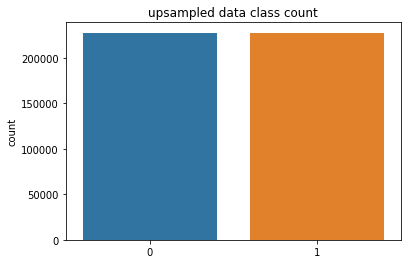

In [ ]:
y=upsampled.Class.value_counts()
sns.barplot(y=y,x=[0,1])
plt.title('upsampled data class count')
plt.ylabel('count')

<div align='left'><font size='4' color=' #6c3483'>  2. Undersample majority class </font></div>


In [ ]:
not_fraud_downsampled = resample(not_fraud,
                                replace = False, # sample without replacement
                                n_samples = len(fraud), # match minority n
                                random_state = 27) # reproducible results

# combine minority and downsampled majority
downsampled = pd.concat([not_fraud_downsampled, fraud])

# checking counts
downsampled.Class.value_counts()

1    394
0    394
Name: Class, dtype: int64

Text(0, 0.5, 'count')

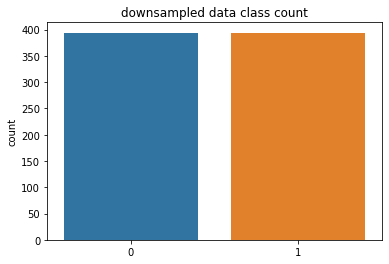

In [ ]:
y=downsampled.Class.value_counts()
sns.barplot(y=y,x=[0,1])
plt.title('downsampled data class count')
plt.ylabel('count')

# Exercise 1. Build simple pytorch training funtion 

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import torch.optim as optim

def train_NN(X_train, y_train, X_test, y_test):
    """
    params X_train, y_train, X_test, y_test (array-like): numpy array type dataset

        - It is simple dataset so you don't need to build "class Dataset"
          use torch.utils.data.TensorDataset after tensorize your data

        - your model's first layer should have same size with input feautures 
          (we call this variable as input_dim or input_size)

        - print 'loss of every epoch, and classification report' 
    
    return nothing (void)
    """
    # 1. tensorize the data
    tensorx = torch.tensor(X_train, dtype=torch.float)
    tensory = torch.tensor(y_train, dtype=torch.float)

    ds = TensorDataset(tensorx, tensory)
    # 2. build dataloader
    dl = DataLoader(ds, batch_size=256, shuffle=True)

    input_size = tensorx.size(1)
    # 3. build model, loss func, optimizer
    model = nn.Sequential(nn.Linear(input_size, 256),
                          nn.ReLU(),
                          nn.Dropout(),
                          nn.Linear(256, 64),
                          nn.ReLU(),
                          nn.Dropout(),
                          nn.Linear(64,1),
                          nn.Sigmoid())
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=1e-3) #(Adam 더블유?)

    # 4. write training process
    n_epoch = 5
    for ep in range(n_epoch):
      loss_total = 0
      for x, y in dl:
        out = model(x)
        loss = criterion(out.squeeze(), y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        loss_total += loss


        print(f"{ep} epoch loss {loss_total / len(dl)}")

    # 5. use test data to check out classification result
    test_tensor = torch.tensor(X_test, dtype=torch.float)
    out = model(test_tensor)
    y_pred = np.array([1 if pred > 0.5 else 0 for pred in out.detach().squeeze().tolist()])
    print(classification_report(y_test, y_pred, target_names=['NotFraud', 'Fraud'], digits=4))

In [ ]:
train_NN(upsampled.drop(['Class'], axis=1).to_numpy(), upsampled['Class'].to_numpy(),  fraud_X_test, fraud_y_test)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
2 epoch loss 0.0017602156149223447
2 epoch loss 0.0017713259439915419
2 epoch loss 0.0017815474420785904
2 epoch loss 0.0017866985872387886
2 epoch loss 0.0017927000299096107
2 epoch loss 0.0017956554656848311
2 epoch loss 0.0018002698197960854
2 epoch loss 0.0018069481011480093
2 epoch loss 0.0018136678263545036
2 epoch loss 0.0018183074425905943
2 epoch loss 0.0018229481065645814
2 epoch loss 0.00183187669608742
2 epoch loss 0.0018337323563173413
2 epoch loss 0.0018385057337582111
2 epoch loss 0.0018473239615559578
2 epoch loss 0.001858613220974803
2 epoch loss 0.0018652690341696143
2 epoch loss 0.001871891668997705
2 epoch loss 0.0018807569285854697
2 epoch loss 0.0018851705826818943
2 epoch loss 0.0018854523077607155
2 epoch loss 0.0018877822440117598
2 epoch loss 0.0018926606280729175
2 epoch loss 0.001899676863104105
2 epoch loss 0.0019086014945060015
2 epoch loss 0.0019130213186144829
2 epoch loss 0.0019240602850914001
2 epoch loss 0.001926897

oversampling good

In [ ]:
train_NN(not_fraud_downsampled.drop(['Class'], axis=1).to_numpy(), not_fraud_downsampled['Class'].to_numpy(),  fraud_X_test, fraud_y_test)

0 epoch loss 0.10101902484893799
0 epoch loss 0.19006884098052979
1 epoch loss 0.07892321050167084
1 epoch loss 0.14763635396957397
2 epoch loss 0.05726933106780052
2 epoch loss 0.10697704553604126
3 epoch loss 0.041503481566905975
3 epoch loss 0.07963120937347412
4 epoch loss 0.02969433180987835
4 epoch loss 0.0529688224196434
              precision    recall  f1-score   support

    NotFraud     0.9983    1.0000    0.9991     56864
       Fraud     0.0000    0.0000    0.0000        98

    accuracy                         0.9983     56962
   macro avg     0.4991    0.5000    0.4996     56962
weighted avg     0.9966    0.9983    0.9974     56962



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


undersampling bad

# New dataset

<class 'numpy.ndarray'>


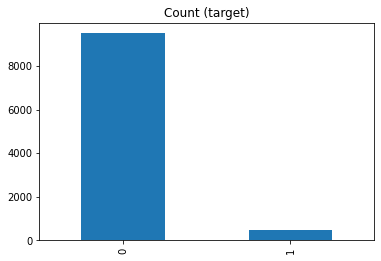

In [ ]:
from sklearn.datasets import make_classification

X, y = make_classification(
    n_classes=2, n_features=20, weights=[0.95, 0.05], n_samples=10000,
    n_informative=3, class_sep=2.0, flip_y=0, random_state=10
)
X_train,X_test,y_train,y_test=train_test_split(X,
                                               y,
                                               test_size=.2,
                                               random_state=1,
                                               stratify=y)
print(type(X))
ndf = pd.DataFrame(X)
ndf['target'] = y
ndf.target.value_counts().plot(kind='bar', title='Count (target)')

In [ ]:
def plot_2d_space(X_train, y_train,X=X,y=y,label='Classes', scale=2):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    
    fig,(ax1,ax2)=plt.subplots(1,2, figsize=(8,4))
   
    for l, c, m in zip(np.unique(y), colors, markers):
        ax1.scatter(
            X_train[y_train==l, 0],
            X_train[y_train==l, 1],
            c=c, label=l, marker=m, s=scale
        )
    for l, c, m in zip(np.unique(y), colors, markers):
        ax2.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m, s=scale
        )
   
    ax1.set_title(label)
    ax2.set_title('fraud data')
    plt.legend(loc='upper right')
    plt.show()


## Python imbalanced-learn module

In [ ]:
import imblearn

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


<div align='left'><font size='4' color=' #6c3483'>  Random under-sampling  with imbalanced-learn </font></div>



/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


The number of removed indices are  800


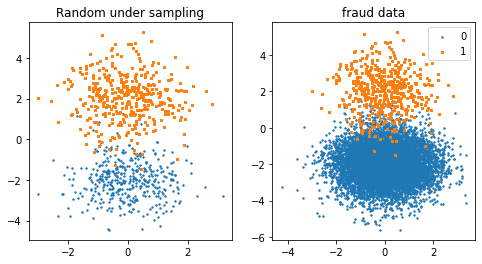

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

ran=RandomUnderSampler(return_indices=True) ##intialize to return indices of dropped rows
X_rus,y_rus,dropped = ran.fit_sample(X_train,y_train)

print("The number of removed indices are ",len(dropped))
plot_2d_space(X_rus,y_rus,X,y,'Random under sampling')

<div align='left'><font size='4' color=' #6c3483'>  Random over-sampling  with imbalanced-learn </font></div>



/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


The new data contains 15200 rows 


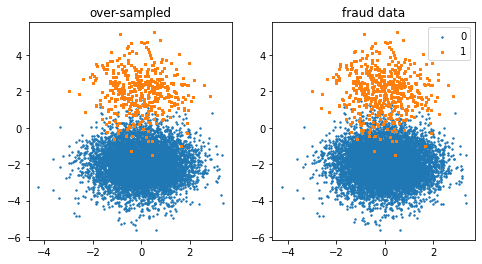

In [ ]:
from imblearn.over_sampling import RandomOverSampler

ran=RandomOverSampler()
X_ros,y_ros= ran.fit_resample(X_train,y_train)

print('The new data contains {} rows '.format(X_ros.shape[0]))

plot_2d_space(X_ros,y_ros,X,y,'over-sampled')


## Under-sampling: Tomek links


![](https://raw.githubusercontent.com/rafjaa/machine_learning_fecib/master/src/static/img/tomek.png?v=2)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


(10000, 20)
(7994, 20)
Remaining indices: 7994


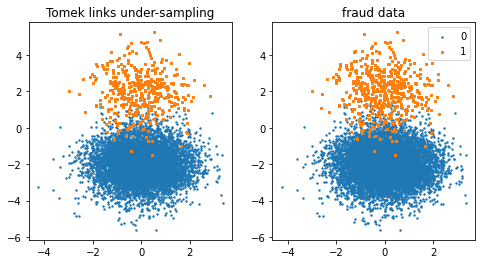

In [ ]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks(return_indices=True, ratio='majority')
X_tl, y_tl, id_tl = tl.fit_sample(X_train,y_train)
print(X.shape)
print(X_tl.shape)

print('Remaining indices:', len(id_tl))

plot_2d_space(X_tl, y_tl,X,y, 'Tomek links under-sampling')

## Over-sampling: SMOTE





![](https://raw.githubusercontent.com/rafjaa/machine_learning_fecib/master/src/static/img/smote.png)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


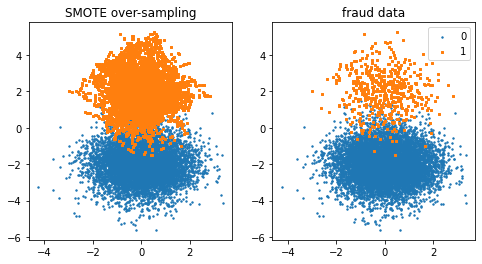

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(ratio='minority')
X_sm, y_sm = smote.fit_sample(X_train,y_train)

plot_2d_space(X_sm, y_sm,X,y, 'SMOTE over-sampling')

# Exercise 2. Test sampling techniques by your own model.

In [ ]:
train_NN(X_train, y_train, X_test, y_test) # normal

0 epoch loss 0.006471153348684311
0 epoch loss 0.011732105165719986
0 epoch loss 0.015969503670930862
0 epoch loss 0.02003641054034233
0 epoch loss 0.02311773970723152
0 epoch loss 0.025638757273554802
0 epoch loss 0.02801411598920822
0 epoch loss 0.030067212879657745
0 epoch loss 0.03168169781565666
0 epoch loss 0.03349660336971283
0 epoch loss 0.035157710313797
0 epoch loss 0.03655783832073212
0 epoch loss 0.03851645812392235
0 epoch loss 0.03985141962766647
0 epoch loss 0.04157289117574692
0 epoch loss 0.04294247180223465
0 epoch loss 0.04422994330525398
0 epoch loss 0.04527797922492027
0 epoch loss 0.046737633645534515
0 epoch loss 0.04796726256608963
0 epoch loss 0.04952014982700348
0 epoch loss 0.051638439297676086
0 epoch loss 0.05295208841562271
0 epoch loss 0.054543063044548035
0 epoch loss 0.05585741251707077
0 epoch loss 0.057288073003292084
0 epoch loss 0.05883855000138283
0 epoch loss 0.05984140932559967
0 epoch loss 0.06178700551390648
0 epoch loss 0.06338387727737427
0 e

In [ ]:
train_NN(X_rus, y_rus, X_test, y_test)

0 epoch loss 0.060638561844825745
0 epoch loss 0.11750838905572891
0 epoch loss 0.17206799983978271
0 epoch loss 0.22764481604099274
1 epoch loss 0.04790283739566803
1 epoch loss 0.0927954912185669
1 epoch loss 0.13559246063232422
1 epoch loss 0.17781473696231842
2 epoch loss 0.03697407990694046
2 epoch loss 0.07214763760566711
2 epoch loss 0.10527962446212769
2 epoch loss 0.13586045801639557
3 epoch loss 0.028132222592830658
3 epoch loss 0.05468282103538513
3 epoch loss 0.07970459759235382
3 epoch loss 0.09689360857009888
4 epoch loss 0.02116703987121582
4 epoch loss 0.04137861728668213
4 epoch loss 0.060607634484767914
4 epoch loss 0.07352340221405029
              precision    recall  f1-score   support

    NotFraud     0.9957    0.9747    0.9851      1900
       Fraud     0.6571    0.9200    0.7667       100

    accuracy                         0.9720      2000
   macro avg     0.8264    0.9474    0.8759      2000
weighted avg     0.9788    0.9720    0.9742      2000



In [ ]:
train_NN(X_ros, y_ros, X_test, y_test)

0 epoch loss 0.004116951487958431
0 epoch loss 0.008006393909454346
0 epoch loss 0.011600291356444359
0 epoch loss 0.015072274021804333
0 epoch loss 0.01830480806529522
0 epoch loss 0.021380625665187836
0 epoch loss 0.02412901632487774
0 epoch loss 0.026584992185235023
0 epoch loss 0.028972147032618523
0 epoch loss 0.03116525337100029
0 epoch loss 0.033322181552648544
0 epoch loss 0.03494851291179657
0 epoch loss 0.03656366840004921
0 epoch loss 0.03807370364665985
0 epoch loss 0.03933042287826538
0 epoch loss 0.040581561625003815
0 epoch loss 0.0416831336915493
0 epoch loss 0.042658619582653046
0 epoch loss 0.04362734779715538
0 epoch loss 0.0443439856171608
0 epoch loss 0.045177239924669266
0 epoch loss 0.04600554704666138
0 epoch loss 0.04656194895505905
0 epoch loss 0.047395844012498856
0 epoch loss 0.04808990657329559
0 epoch loss 0.04865478351712227
0 epoch loss 0.04922002553939819
0 epoch loss 0.04970400407910347
0 epoch loss 0.05032699555158615
0 epoch loss 0.050751641392707825

In [ ]:
train_NN(X_tl, y_tl, X_test, y_test)

0 epoch loss 0.0071705179288983345
0 epoch loss 0.013147751800715923
0 epoch loss 0.018017329275608063
0 epoch loss 0.02256833203136921
0 epoch loss 0.026140158995985985
0 epoch loss 0.029500219970941544
0 epoch loss 0.03245469927787781
0 epoch loss 0.03506508469581604
0 epoch loss 0.03685041517019272
0 epoch loss 0.03879820927977562
0 epoch loss 0.04073212295770645
0 epoch loss 0.04299616813659668
0 epoch loss 0.04523547738790512
0 epoch loss 0.0462721548974514
0 epoch loss 0.04744309186935425
0 epoch loss 0.048917386680841446
0 epoch loss 0.05084051936864853
0 epoch loss 0.052262742072343826
0 epoch loss 0.054340630769729614
0 epoch loss 0.055726308375597
0 epoch loss 0.05715932324528694
0 epoch loss 0.058558523654937744
0 epoch loss 0.059961285442113876
0 epoch loss 0.06199652701616287
0 epoch loss 0.06328990310430527
0 epoch loss 0.06467626988887787
0 epoch loss 0.06647727638483047
0 epoch loss 0.0677494928240776
0 epoch loss 0.06952474266290665
0 epoch loss 0.07054823637008667
0 e

In [ ]:
train_NN(X_sm, y_sm, X_test, y_test)

0 epoch loss 0.004394506104290485
0 epoch loss 0.008438159711658955
0 epoch loss 0.012243745848536491
0 epoch loss 0.015798309817910194
0 epoch loss 0.01917734369635582
0 epoch loss 0.022188354283571243
0 epoch loss 0.025032542645931244
0 epoch loss 0.027851639315485954
0 epoch loss 0.030325809493660927
0 epoch loss 0.032681744545698166
0 epoch loss 0.034818194806575775
0 epoch loss 0.03689789026975632
0 epoch loss 0.038899730890989304
0 epoch loss 0.04067539423704147
0 epoch loss 0.04220376908779144
0 epoch loss 0.04367029294371605
0 epoch loss 0.044857658445835114
0 epoch loss 0.045941662043333054
0 epoch loss 0.04682851582765579
0 epoch loss 0.04779418930411339
0 epoch loss 0.048533108085393906
0 epoch loss 0.049329835921525955
0 epoch loss 0.05005578324198723
0 epoch loss 0.05079207941889763
0 epoch loss 0.051364973187446594
0 epoch loss 0.051906902343034744
0 epoch loss 0.052426595240831375
0 epoch loss 0.05292355641722679
0 epoch loss 0.053349725902080536
0 epoch loss 0.053848948

# THINKING - Apply it to what we have learned

## Image Data Augmentation 

Can be treated as oversampling techniques ( one more oversampling techniques)

In [ ]:
torchvision.transforms 

A = transforms.Compose(
        [transforms.RandomResizedCrop(224),
         transforms.RandomHorizontalFlip(),
         transforms.ToTensor(),
         transforms.Normalize(mean=[0.485, 0.456, 0.406],
                              std=[0.229, 0.224, 0.225]),
         ])

B = transforms.Compose(
        [transforms.CenterCrop(10),
         transforms.RandomAffine(),
         transforms.ToTensor(),
         transforms.Normalize(mean=[0.485, 0.456, 0.406],
                              std=[0.229, 0.224, 0.225]),
         ])

data1 = datasets.ImageFolder(root=root_path + dir, transform=A)
data2 = datasets.ImageFolder(root=root_path + dir, transform=B)

## Text Data Augmentation

In [ ]:
!pip install textaugment >> /dev/null 2>&1

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
from textaugment import Wordnet

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
ex = 'In the afternoon, John is going to town'

In [ ]:
t = Wordnet(v=True ,n=True, p=0.9)
t.augment(ex)

'in the afternoon, john equal travel to township'

word is changed to similar data